In [1]:
import Library.Assign6 as t1
import math
import numpy as np
import matplotlib.pyplot as plt
from Library.Class5 import Lagrange

Question 1: Use RK4 to solve the damped and forced harmonic oscillator satisfying
2y'' + γy' + 2y = 2 cos(ωt), where y(0) = 2, y'(0) = −1

for γ = 0.2 and ω = 1.2.

Solution at t = 2.0000000000000004 , is: x = -1.491233504402901 , v = -1.2337547536873243


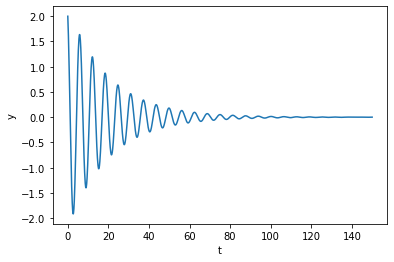

In [2]:
#For damped oscillator (2y'' + 0.2y' + 2y = 0)

def dxdt(x,v,t): 
    return v

def dvdt(x,v,t):
    return -0.5*(0.2*v + 2*x)

T,V,X = t1.CODE1(0,2,-1,dxdt,dvdt,0.1,150)
plt.xlabel("t")
plt.ylabel("y")
plt.plot(T,X)

#Solution at any arbitrary point in domain
print("Solution at t =",T[20], ", is: x =", X[20],", v =",V[20]) 


Solution at t = 3.0000000000000013 , is: x = -2.048650522120552 , v = -0.8060347166955201


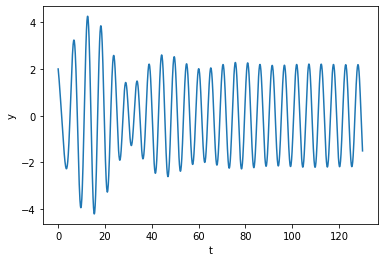

In [3]:
#For damped oscillator (2y'' + 0.2y' + 2y = 2cos(1.2*t))

def dxdt1(x,v,t): 
    return v

def dvdt1(x,v,t):
    return -0.5*(0.2*v + 2*x - 2*np.cos(1.2*t))

T,V,X = t1.CODE1(0,2,-1,dxdt1,dvdt1,0.1,130)
plt.xlabel("t")
plt.ylabel("y")
plt.plot(T,X)

#Solution at any arbitrary point in domain
print("Solution at t =",T[30], ", is: x =", X[30],", v =",V[30])

Question 2: Equation for heat conduction in a thin, un-insulated rod of length L = 10 m is

T(x)'' + α(Ta − T(x)) = 0

where the heat transfer coefficient α = 0.01 m−2 parameterizes heat dissipated to the surrounding air and Ta = 20 C is the ambient temperature. If T(x = 0) = 40 C and T(x = L) = 200 C, solve the boundary value problem using Shooting Method with RK4 integrator and determine at what x the temperature is T = 100 C.

In [4]:
def dxdt2(x,v,t):
    return v 

def dvdt2(x,v,t):
    return 0.01*(x-20)

#The two guesses for slopes are -2e10 and 2e10
v0,k,x=t1.bound(0,10,40,200,dxdt2,dvdt2,-2e10,2e10,0.2,1e-6) #Tolerance = 1e-6 

print("\nSlope v(x = 0)= ",v0,", Iterations:",k)
print("Solution T(x = 10):",x,"\n")

T,V,X=t1.CODE1(0,40,12.690455761856311,dxdt2,dvdt2,0.2,10)
print("x(T = 100):",Lagrange(X,T,100)) #Finding x at T = 100 C by iterpolating


Slope v(x = 0)=  12.690455761856317 , Iterations: 1
Solution T(x = 10): 200.00000000000014 

x(T = 100): 4.42526190890304


Question 3: Solve the 1-dimensional heat equation uxx = ut over a conducting bar, of length 2 units, kept at 0o C but is heated to 300 C at its center at time t = 0. Choose your ∆x and ∆t with care such that ∆t/(∆x)

Temperature at x =  0.6000000000000001 units, after time t = 1s is: T = 7.6228091888200575 C


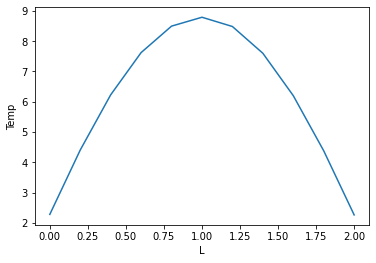

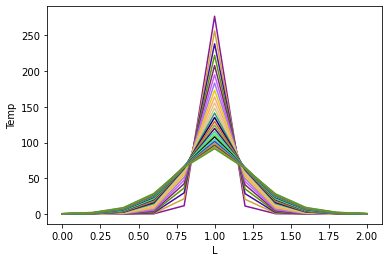

In [5]:
#U(x,0) function
def func(x):
    if x==1: return 300
    else: return 0
    
#Finding arbitrary solution U(1.3,1)
Y,X = t1.pardif(0,2,4,10,5000,func,1)  # alpha = nx**2/nt = 100/5000 << 0.5
print("Temperature at x = ", X[3][0], "units, after time t = 1s is: T =", Y[3][0],"C")
plt.xlabel("L")
plt.ylabel("Temp")
plt.plot(X,Y)

#Plotting temperature curves for time steps t = 0.04s to t = 1s
t1.pardif_plotter(0,2,4,10,5000,func,25)

Question 4: Find the dominant eigenvalue and its corresponding normalized eigenvector to a
precision of 10−3 for the matrix given below. How many iterations does it take to achieve this precision?
2 1 2
2 2 −2
3 1 1

In [6]:
A=[[2,1,2],[2,2,-2],[3,1,1]]

#Guess vector
x0=[[0.3],[0.5],[1]]

t1.powriter(A,x0,1e-3)

Eigenvalue: 4.0 , Iterations:  9 

Eigenket:


[[0.707], [0.0], [0.707]]